# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:

url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={unit}&q={city}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | merizo village
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | zaozersk
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | sabang
Processing Record 9 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 10 of Set 1 | enewetak
Processing Record 11 of Set 1 | bali
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | la'ie
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | puerto lempira
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | lyubim
Processing Record 20 of Set 1 | puerto aysen
Processing Record 21 of Set 1 | papatowai
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,62.82,91,97,5.01,NZ,2024-02-27 17:04:59
1,merizo village,13.2658,144.6691,82.13,79,55,15.99,GU,2024-02-27 17:05:00
2,blackmans bay,-43.0167,147.3167,69.73,60,100,1.01,AU,2024-02-27 17:05:01
3,qaqortoq,60.7167,-46.0333,24.73,96,100,5.95,GL,2024-02-27 17:05:02
4,zaozersk,69.4005,32.4476,21.90,88,84,14.90,RU,2024-02-27 17:05:03


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,62.82,91,97,5.01,NZ,2024-02-27 17:04:59
1,merizo village,13.2658,144.6691,82.13,79,55,15.99,GU,2024-02-27 17:05:00
2,blackmans bay,-43.0167,147.3167,69.73,60,100,1.01,AU,2024-02-27 17:05:01
3,qaqortoq,60.7167,-46.0333,24.73,96,100,5.95,GL,2024-02-27 17:05:02
4,zaozersk,69.4005,32.4476,21.90,88,84,14.90,RU,2024-02-27 17:05:03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

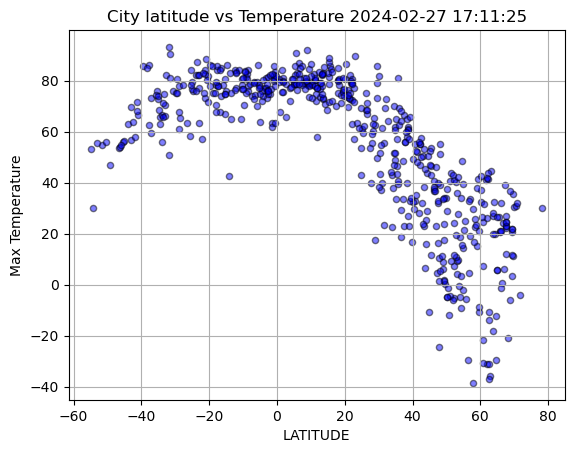

In [23]:
# Build scatter plot for latitude vs. temperature
todays_date = city_data_df["Date"].max()
Latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
x_values = Latitude
y_values = temperature
plt.scatter(x_values,y_values, marker =".",color = "blue",s=80,alpha = 0.5,edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("LATITUDE")
plt.ylabel("Max Temperature")
plt.title(f"City latitude vs Temperature {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

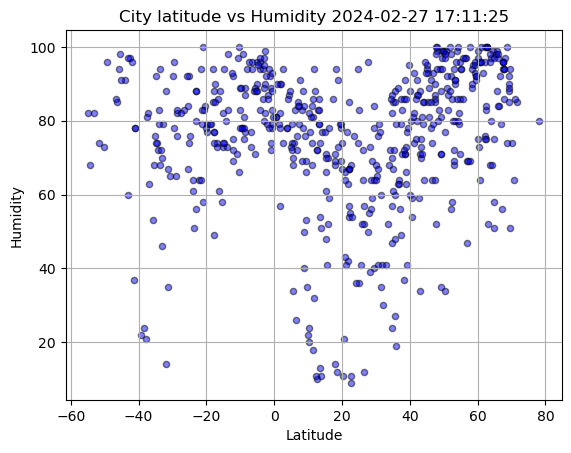

In [24]:
# Build the scatter plots for latitude vs. humidity
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City latitude vs Humidity {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

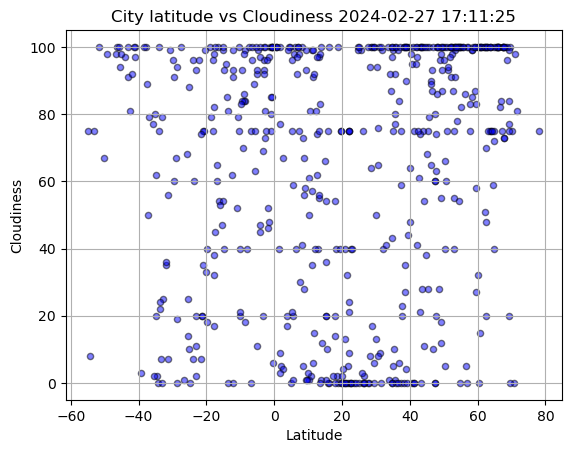

In [25]:
# Build the scatter plots for latitude vs. cloudiness
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City latitude vs Cloudiness {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

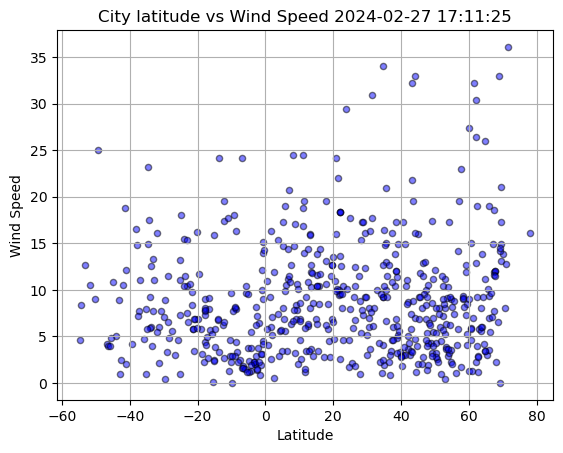

In [26]:
# Build the scatter plots for latitude vs. wind speed
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker =".",c="blue",s=80,alpha = 0.5,edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City latitude vs Wind Speed {todays_date}")
plt.grid()
plt.tight_layout

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,x_lineq_point,y_lineq_point):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values*slope + intercept
    line_eq = "y = "+ str(round(slope,2)) + "x  + " + str(round(intercept,2))
    plot = plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_lineq_point,y_lineq_point),fontsize=15,color = "red")
    print(f"the r value is :{rvalue}")
    plt.xlabel("Latitude")

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,merizo village,13.2658,144.6691,82.13,79,55,15.99,GU,2024-02-27 17:05:00
3,qaqortoq,60.7167,-46.0333,24.73,96,100,5.95,GL,2024-02-27 17:05:02
4,zaozersk,69.4005,32.4476,21.90,88,84,14.90,RU,2024-02-27 17:05:03
7,sabang,5.8933,95.3214,83.14,74,98,18.97,ID,2024-02-27 17:05:05
8,enewetak,11.3474,162.3373,80.37,81,91,14.00,MH,2024-02-27 17:05:06


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,62.82,91,97,5.01,NZ,2024-02-27 17:04:59
2,blackmans bay,-43.0167,147.3167,69.73,60,100,1.01,AU,2024-02-27 17:05:01
5,edinburgh of the seven seas,-37.0676,-12.3116,59.59,63,79,11.10,SH,2024-02-27 17:05:04
6,grytviken,-54.2811,-36.5092,29.95,68,8,8.34,GS,2024-02-27 17:05:04
9,bali,-8.5000,115.0000,77.97,87,84,3.31,ID,2024-02-27 17:05:07


###  Temperature vs. Latitude Linear Regression Plot

the r value is :-0.8291590805003112


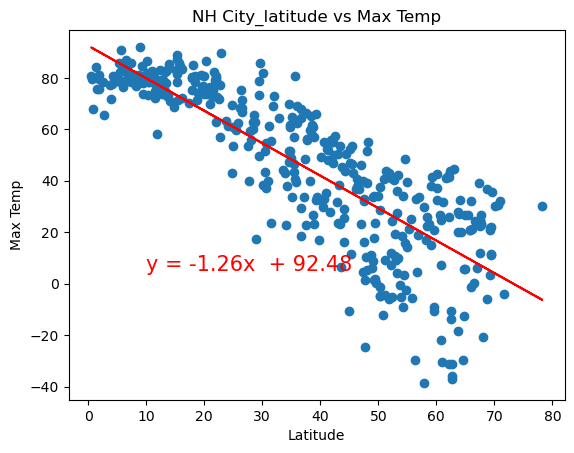

In [30]:

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_lineq_point = 10
y_lineq_point = 5

#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Max Temp")
plt.title("NH City_latitude vs Max Temp")
plt.show()

the r value is :0.5156231419367323


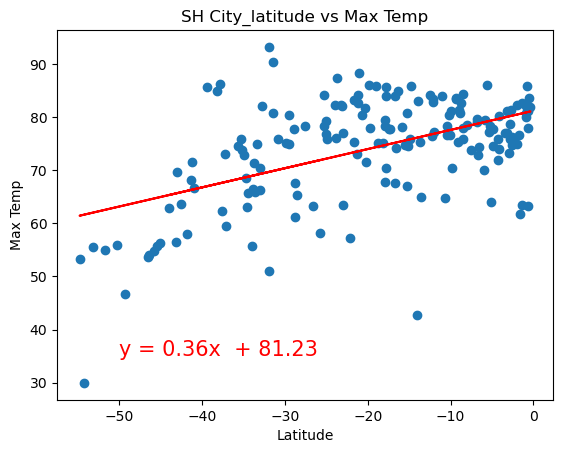

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_lineq_point = -50
y_lineq_point = 35

linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Max Temp")
plt.title("SH City_latitude vs Max Temp")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r value is :0.39608644192513454


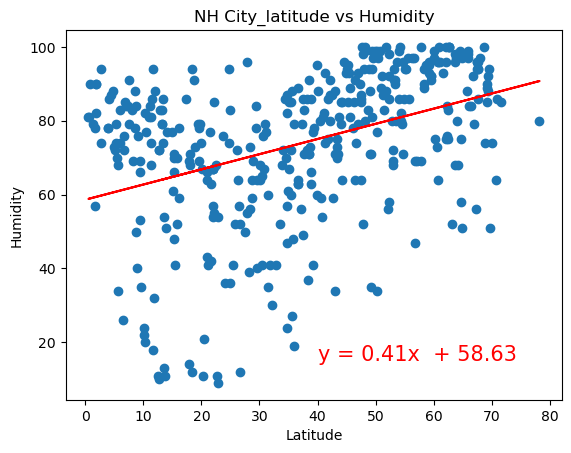

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_lineq_point = 40
y_lineq_point = 15

linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Humidity")
plt.title("NH City_latitude vs Humidity")
plt.show()

the r value is :0.29736663472538843


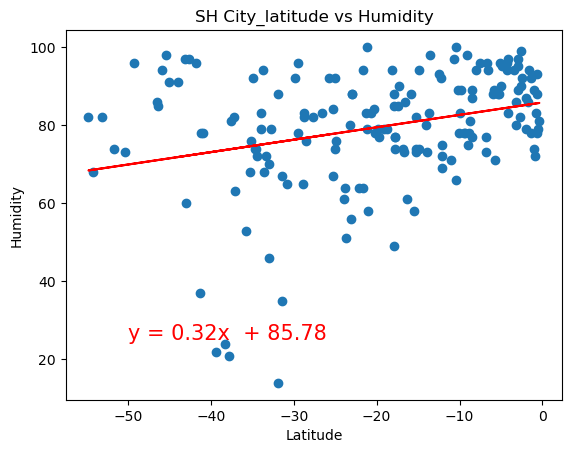

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_lineq_point = -50
y_lineq_point = 25

linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Humidity")
plt.title("SH City_latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r value is :0.32598555525751005


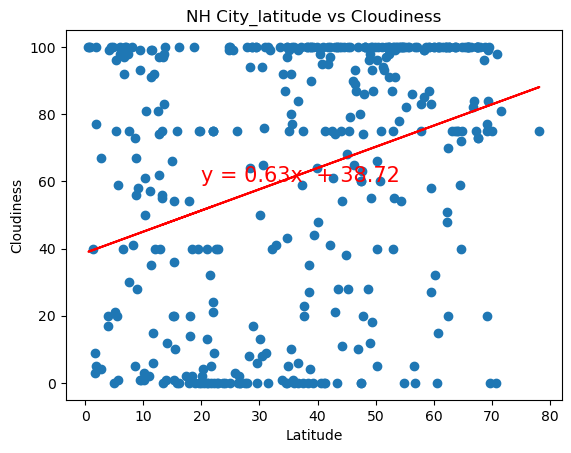

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_lineq_point = 20
y_lineq_point = 60
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Cloudiness")
plt.title("NH City_latitude vs Cloudiness")
plt.show()

the r value is :0.09188405032672055


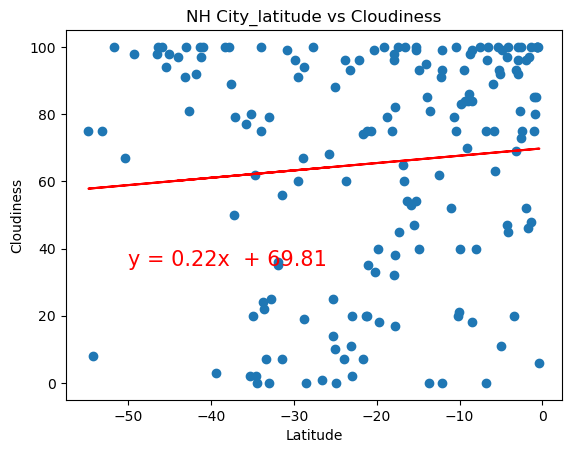

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_lineq_point = -50
y_lineq_point = 35

linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Cloudiness")
plt.title("NH City_latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r value is :-0.0005566243582259003


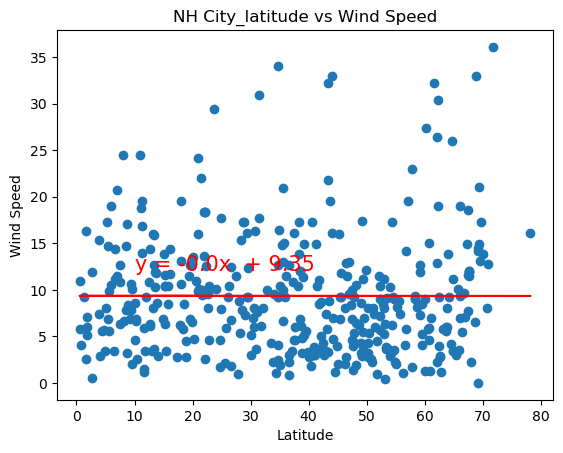

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_lineq_point = 10
y_lineq_point = 12

linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Wind Speed")
plt.title("NH City_latitude vs Wind Speed")
plt.show()

the r value is :-0.21674607686164155


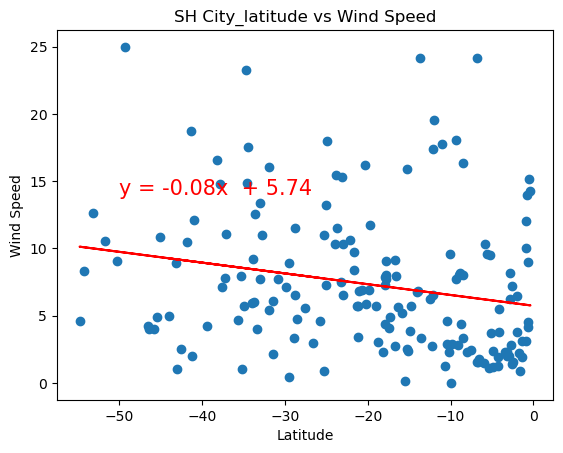

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_lineq_point = -50
y_lineq_point = 14
#applying the function
linearRegression(x_values,y_values,x_lineq_point,y_lineq_point)
plt.ylabel("Wind Speed")
plt.title("SH City_latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE